In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

# Transformation definitions for the data
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Loading the datasets
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Simple split into Train and Validation sets
train_indices = list(range(0, int(0.8 * len(train_data))))  # 80% for training
val_indices = list(range(int(0.8 * len(train_data)), len(train_data)))  # 20% for validation

train_dataset = Subset(train_data, train_indices)
val_dataset = Subset(train_data, val_indices)

# Creating DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Printing the sizes of each dataset
print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_data)}")


Files already downloaded and verified
Files already downloaded and verified
Train set size: 40000
Validation set size: 10000
Test set size: 10000


In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np


# Function to calculate the accuracy of the model
def calculate_accuracy(model, data_loader):
    correct = 0
    total = 0

    # Disable gradient computation to save memory and computation
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            # Get the predicted class with the highest probability
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Return accuracy in percentage
    return 100 * correct / total


# Function to train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    train_losses = []  # List to store the training losses
    train_accuracies = []  # List to store the training accuracies
    val_accuracies = []  # List to store the validation accuracies

    # Loop over the epochs
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0  # Variable to accumulate the loss for the current epoch

        # Loop over batches in the training data
        for inputs, labels in train_loader:
            optimizer.zero_grad()  # Reset the gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update the model weights
            running_loss += loss.item()  # Accumulate the loss

        # Calculate average training loss for this epoch
        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Calculate training accuracy
        train_accuracy = calculate_accuracy(model, train_loader)
        train_accuracies.append(train_accuracy)

        # Print the progress for each epoch
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%')

    # Evaluate the model on the validation set
    model.eval()  # Set the model to evaluation mode
    val_accuracy = calculate_accuracy(model, val_loader)
    val_accuracies.append(val_accuracy)
    model.train()  # Switch back to training mode

    # Print final validation accuracy
    print(f'Final Validation Accuracy: {val_accuracy:.2f}%')

    # Plot the training loss and accuracy over epochs
    plt.figure(figsize=(10, 5))

    # Subplot for training loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss per Epoch')
    plt.legend()

    # Subplot for training accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Accuracy')
    plt.legend()

    # Display the plots
    plt.show()

    # Print the final training accuracy
    print(f'Final Train Accuracy: {train_accuracies[-1]:.2f}%')

    return model  # Return the trained model


## **Experiment 1**

Epoch [1/10], Loss: 1.5433, Train Acc: 54.73%
Epoch [2/10], Loss: 1.1677, Train Acc: 64.14%
Epoch [3/10], Loss: 1.0106, Train Acc: 67.91%
Epoch [4/10], Loss: 0.8937, Train Acc: 72.15%
Epoch [5/10], Loss: 0.7891, Train Acc: 76.63%
Epoch [6/10], Loss: 0.6963, Train Acc: 80.66%
Epoch [7/10], Loss: 0.5990, Train Acc: 83.47%
Epoch [8/10], Loss: 0.5015, Train Acc: 85.89%
Epoch [9/10], Loss: 0.4159, Train Acc: 89.93%
Epoch [10/10], Loss: 0.3254, Train Acc: 90.93%
Final Validation Accuracy: 68.33%


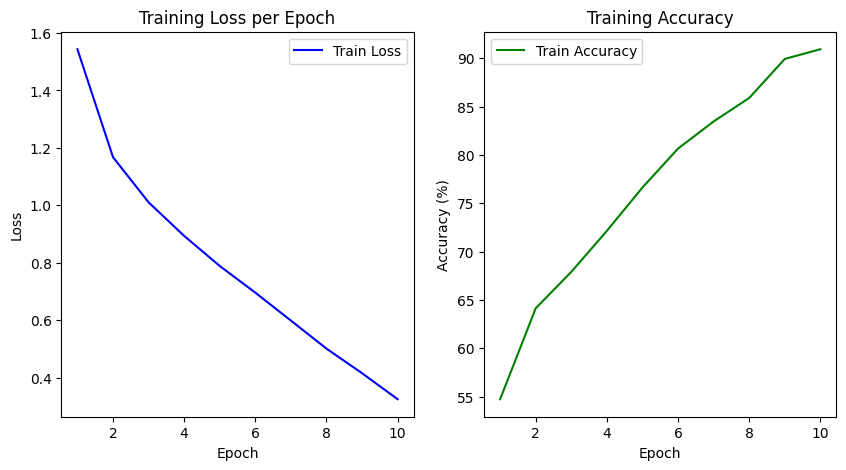

Final Train Accuracy: 90.93%
Final Validation Accuracy: 68.33%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)


        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)

        # fully connected
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)

        return x


model3 = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=0.001)


train_model(model3, train_loader, val_loader, criterion, optimizer, num_epochs=10)


val_accuracy = calculate_accuracy(model3, val_loader)
print(f'Final Validation Accuracy: {val_accuracy:.2f}%')


## **Experiment 2**

Epoch [1/10], Loss: 1.5422, Train Acc: 54.03%
Epoch [2/10], Loss: 1.1718, Train Acc: 63.18%
Epoch [3/10], Loss: 1.0115, Train Acc: 67.03%
Epoch [4/10], Loss: 0.8931, Train Acc: 70.56%
Epoch [5/10], Loss: 0.8002, Train Acc: 75.70%
Epoch [6/10], Loss: 0.7107, Train Acc: 78.25%
Epoch [7/10], Loss: 0.6307, Train Acc: 79.90%
Epoch [8/10], Loss: 0.5506, Train Acc: 85.06%
Epoch [9/10], Loss: 0.4689, Train Acc: 87.58%
Epoch [10/10], Loss: 0.3797, Train Acc: 90.62%
Final Validation Accuracy: 70.64%


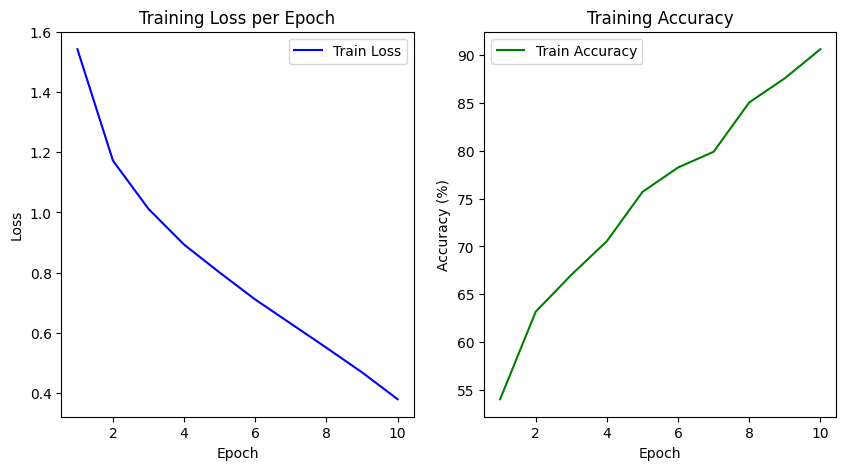

Final Train Accuracy: 90.62%
Final Validation Accuracy: 70.64%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Building the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        # Apply ReLU activation after convolutional layers
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)  # Max-pooling
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)  # Max-pooling
        x = x.view(x.size(0), -1)  # Reshaping for fully connected layer

        # Fully connected layer with ReLU activation
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  # Output layer

        return x

# Create the model, criterion, and optimizer
model3 = CNN()
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.Adam(model3.parameters(), lr=0.001)  # Adam optimizer for more stable learning

# Train the model
train_model(model3, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Evaluate the accuracy on the validation set
val_accuracy = calculate_accuracy(model3, val_loader)
print(f'Final Validation Accuracy: {val_accuracy:.2f}%')


## **Experiment 3**

Epoch [1/10], Loss: 1.6387, Train Acc: 52.14%
Epoch [2/10], Loss: 1.2721, Train Acc: 59.71%
Epoch [3/10], Loss: 1.1242, Train Acc: 63.50%
Epoch [4/10], Loss: 1.0265, Train Acc: 66.71%
Epoch [5/10], Loss: 0.9389, Train Acc: 69.21%
Epoch [6/10], Loss: 0.8675, Train Acc: 72.70%
Epoch [7/10], Loss: 0.7992, Train Acc: 75.11%
Epoch [8/10], Loss: 0.7289, Train Acc: 76.27%
Epoch [9/10], Loss: 0.6743, Train Acc: 78.45%
Epoch [10/10], Loss: 0.6185, Train Acc: 79.97%
Final Validation Accuracy: 68.87%


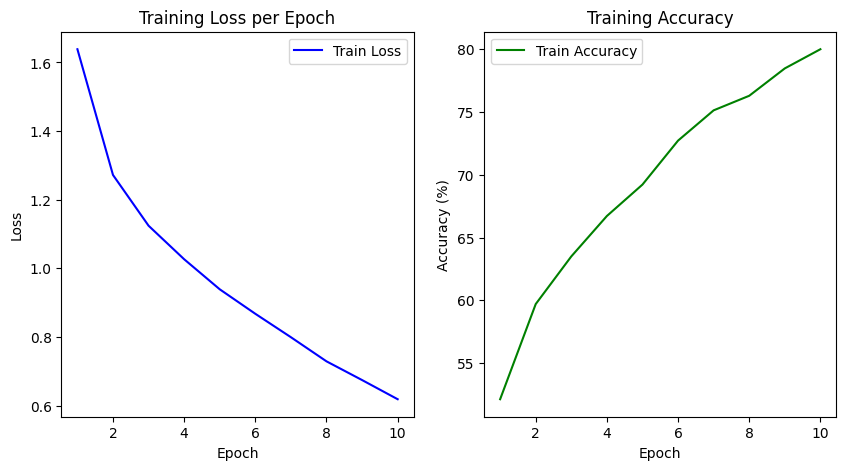

Final Train Accuracy: 79.97%
Final Validation Accuracy: 68.87%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Building the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Apply ReLU activation after the first convolutional layer
        x = self.pool1(x)  # Apply max-pooling after the first convolutional layer
        x = torch.relu(self.conv2(x))  # Apply ReLU activation after the second convolutional layer
        x = self.pool2(x)  # Apply max-pooling after the second convolutional layer
        x = x.view(x.size(0), -1)  # Reshape for the fully connected layer

        # Fully connected layer with ReLU activation
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  # Output layer

        return x

# Create the model, criterion, and optimizer
model3 = CNN()
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification tasks
optimizer = optim.Adam(model3.parameters(), lr=0.001)  # Adam optimizer for stable learning

# Train the model
train_model(model3, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Evaluate the accuracy on the validation set
val_accuracy = calculate_accuracy(model3, val_loader)
print(f'Final Validation Accuracy: {val_accuracy:.2f}%')


## **Experiment 4**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Building the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Apply ReLU activation after the first convolutional layer
        x = self.pool1(x)  # Apply max-pooling after the first convolutional layer
        x = torch.relu(self.conv2(x))  # Apply ReLU activation after the second convolutional layer
        x = self.pool2(x)  # Apply max-pooling after the second convolutional layer
        x = x.view(x.size(0), -1)  # Reshape for the fully connected layer

        # Fully connected layer with ReLU activation
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  # Output layer

        return x

# Create the model, criterion, and optimizer
model3 = CNN()
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification tasks
optimizer = optim.Adam(model3.parameters(), lr=0.001)  # Adam optimizer for stable learning

# Train the model
train_model(model3, train_loader, val_loader, criterion, optimizer, num_epochs=20)

# Evaluate the accuracy on the validation set
val_accuracy = calculate_accuracy(model3, val_loader)
print(f'Final Validation Accuracy: {val_accuracy:.2f}%')


Epoch [1/30], Loss: 1.6207, Train Acc: 52.55%
Epoch [2/30], Loss: 1.2681, Train Acc: 59.27%
Epoch [3/30], Loss: 1.1277, Train Acc: 63.61%
Epoch [4/30], Loss: 1.0170, Train Acc: 64.72%
Epoch [5/30], Loss: 0.9325, Train Acc: 69.66%
Epoch [6/30], Loss: 0.8546, Train Acc: 71.41%
Epoch [7/30], Loss: 0.7994, Train Acc: 73.69%
Epoch [8/30], Loss: 0.7228, Train Acc: 77.13%
Epoch [9/30], Loss: 0.6642, Train Acc: 78.16%
Epoch [10/30], Loss: 0.6010, Train Acc: 83.12%
Epoch [11/30], Loss: 0.5317, Train Acc: 82.81%
Epoch [12/30], Loss: 0.4769, Train Acc: 87.14%
Epoch [13/30], Loss: 0.4048, Train Acc: 89.36%
Epoch [14/30], Loss: 0.3630, Train Acc: 92.31%
Epoch [15/30], Loss: 0.2906, Train Acc: 93.61%
Epoch [16/30], Loss: 0.2293, Train Acc: 94.10%
Epoch [17/30], Loss: 0.1868, Train Acc: 97.30%
Epoch [18/30], Loss: 0.1446, Train Acc: 96.36%
Epoch [19/30], Loss: 0.1133, Train Acc: 98.21%
Epoch [20/30], Loss: 0.0875, Train Acc: 98.64%


KeyboardInterrupt: 

Epoch [1/1], Loss: 0.0492, Train Acc: 99.46%
Final Validation Accuracy: 70.48%


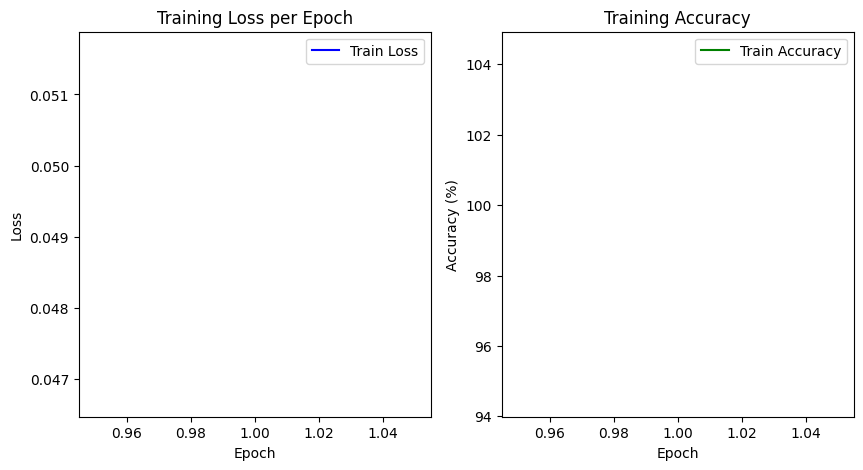

Final Train Accuracy: 99.46%
Final Validation Accuracy: 70.48%


In [ ]:
train_model(model3, train_loader, val_loader, criterion, optimizer, num_epochs=1)


val_accuracy = calculate_accuracy(model3, val_loader)
print(f'Final Validation Accuracy: {val_accuracy:.2f}%')

## **Experiment 5**

Epoch [1/20], Loss: 1.9392, Train Acc: 43.31%
Epoch [2/20], Loss: 1.4796, Train Acc: 49.67%
Epoch [3/20], Loss: 1.3078, Train Acc: 57.40%
Epoch [4/20], Loss: 1.1787, Train Acc: 62.22%
Epoch [5/20], Loss: 1.0633, Train Acc: 65.26%
Epoch [6/20], Loss: 0.9573, Train Acc: 68.71%
Epoch [7/20], Loss: 0.8639, Train Acc: 73.44%
Epoch [8/20], Loss: 0.7753, Train Acc: 76.91%
Epoch [9/20], Loss: 0.6914, Train Acc: 79.16%
Epoch [10/20], Loss: 0.6041, Train Acc: 83.61%
Epoch [11/20], Loss: 0.5160, Train Acc: 86.78%
Epoch [12/20], Loss: 0.4251, Train Acc: 89.41%
Epoch [13/20], Loss: 0.3377, Train Acc: 92.96%
Epoch [14/20], Loss: 0.2575, Train Acc: 92.96%
Epoch [15/20], Loss: 0.1917, Train Acc: 96.05%
Epoch [16/20], Loss: 0.1346, Train Acc: 97.26%
Epoch [17/20], Loss: 0.0919, Train Acc: 98.17%
Epoch [18/20], Loss: 0.0631, Train Acc: 98.99%
Epoch [19/20], Loss: 0.0333, Train Acc: 99.73%
Epoch [20/20], Loss: 0.0179, Train Acc: 99.85%
Final Validation Accuracy: 71.67%


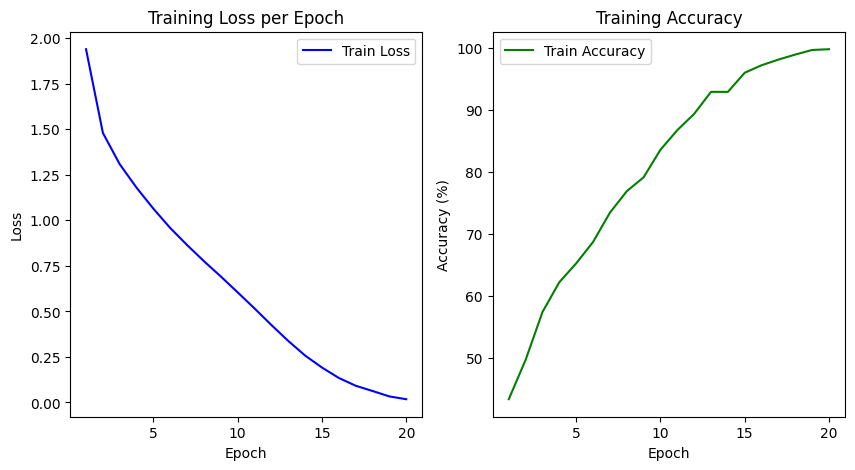

Final Train Accuracy: 99.85%
Final Validation Accuracy: 71.67%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Building the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional Layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)  # Reshaping to a dynamic structure

        # Fully connected layer
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# Creating the model, criterion, and optimizer
model3 = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.01, momentum=0.8, weight_decay=0)

# Training the model
train_model(model3, train_loader, val_loader, criterion, optimizer, num_epochs=20)

# Evaluating the accuracy on the validation set
val_accuracy = calculate_accuracy(model3, val_loader)
print(f'Final Validation Accuracy: {val_accuracy:.2f}%')


## **Experiment 6**

Epoch [1/20], Loss: 1.7830, Train Acc: 48.41%
Epoch [2/20], Loss: 1.3559, Train Acc: 54.11%
Epoch [3/20], Loss: 1.1304, Train Acc: 65.19%
Epoch [4/20], Loss: 0.9586, Train Acc: 69.35%
Epoch [5/20], Loss: 0.8268, Train Acc: 74.39%
Epoch [6/20], Loss: 0.6961, Train Acc: 80.96%
Epoch [7/20], Loss: 0.5765, Train Acc: 86.92%
Epoch [8/20], Loss: 0.4469, Train Acc: 90.28%
Epoch [9/20], Loss: 0.3249, Train Acc: 93.00%
Epoch [10/20], Loss: 0.2238, Train Acc: 95.49%
Epoch [11/20], Loss: 0.1474, Train Acc: 96.08%
Epoch [12/20], Loss: 0.1012, Train Acc: 97.05%
Epoch [13/20], Loss: 0.0743, Train Acc: 98.79%
Epoch [14/20], Loss: 0.0537, Train Acc: 98.31%
Epoch [15/20], Loss: 0.0357, Train Acc: 98.87%
Epoch [16/20], Loss: 0.0321, Train Acc: 98.98%
Epoch [17/20], Loss: 0.0199, Train Acc: 99.73%
Epoch [18/20], Loss: 0.0096, Train Acc: 99.84%
Epoch [19/20], Loss: 0.0026, Train Acc: 100.00%
Epoch [20/20], Loss: 0.0013, Train Acc: 100.00%
Final Validation Accuracy: 72.20%


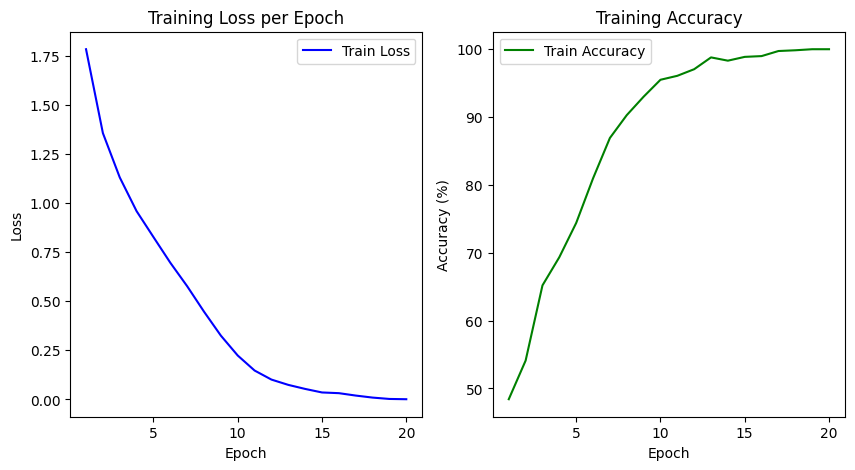

Final Train Accuracy: 100.00%
Final Validation Accuracy: 72.20%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Building the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional Layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)

        # Fully connected layer
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# Creating the model, criterion, and optimizer
model3 = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.01, momentum=0.9, weight_decay=0)

# Training the model
train_model(model3, train_loader, val_loader, criterion, optimizer, num_epochs=20)

# Evaluating the accuracy on the validation set
val_accuracy = calculate_accuracy(model3, val_loader)
print(f'Final Validation Accuracy: {val_accuracy:.2f}%')


## **Experiment 7**

Epoch [1/20], Loss: 1.8776, Train Acc: 45.05%
Epoch [2/20], Loss: 1.4183, Train Acc: 55.39%
Epoch [3/20], Loss: 1.2242, Train Acc: 60.30%
Epoch [4/20], Loss: 1.0814, Train Acc: 66.14%
Epoch [5/20], Loss: 0.9749, Train Acc: 68.75%
Epoch [6/20], Loss: 0.8832, Train Acc: 71.14%
Epoch [7/20], Loss: 0.8145, Train Acc: 75.89%
Epoch [8/20], Loss: 0.7283, Train Acc: 77.36%
Epoch [9/20], Loss: 0.6534, Train Acc: 80.73%
Epoch [10/20], Loss: 0.5859, Train Acc: 82.04%
Epoch [11/20], Loss: 0.5240, Train Acc: 84.50%
Epoch [12/20], Loss: 0.4697, Train Acc: 85.64%
Epoch [13/20], Loss: 0.4113, Train Acc: 88.41%
Epoch [14/20], Loss: 0.3668, Train Acc: 89.81%
Epoch [15/20], Loss: 0.3249, Train Acc: 90.00%
Epoch [16/20], Loss: 0.2918, Train Acc: 92.06%
Epoch [17/20], Loss: 0.2602, Train Acc: 92.00%
Epoch [18/20], Loss: 0.2353, Train Acc: 92.37%
Epoch [19/20], Loss: 0.2158, Train Acc: 93.76%
Epoch [20/20], Loss: 0.1998, Train Acc: 94.94%
Final Validation Accuracy: 72.81%


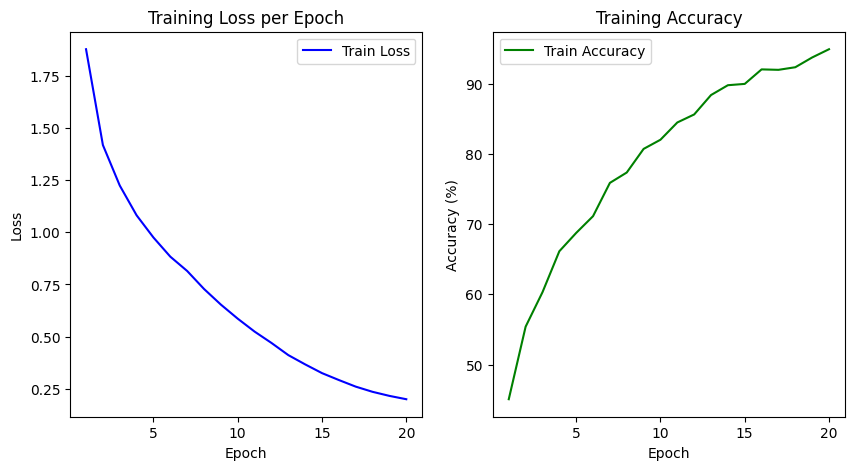

Final Train Accuracy: 94.94%
Final Validation Accuracy: 68.16%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Building the CNN model with Dropout
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)  # Dropout with a probability of 50%

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Apply ReLU activation after the first convolutional layer
        x = self.pool1(x)  # Apply max-pooling after the first convolutional layer
        x = torch.relu(self.conv2(x))  # Apply ReLU activation after the second convolutional layer
        x = self.pool2(x)  # Apply max-pooling after the second convolutional layer
        x = x.view(x.size(0), -1)  # Reshape for the fully connected layer

        # Fully connected layer with Dropout
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Add Dropout after the first fully connected layer
        x = self.fc2(x)  # Output layer

        return x

# Create the model, criterion, and optimizer
model3 = CNN()
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification tasks
optimizer = optim.SGD(model3.parameters(), lr=0.01, momentum=0.9, weight_decay=0)

# Train the model
train_model(model3, train_loader, val_loader, criterion, optimizer, num_epochs=20)

# Evaluate the accuracy on the validation set
val_accuracy = calculate_accuracy(model3, val_loader)
print(f'Final Validation Accuracy: {val_accuracy:.2f}%')


## **Experiment 8**

Epoch [1/20], Loss: 1.9451, Train Acc: 38.46%
Epoch [2/20], Loss: 1.5729, Train Acc: 44.95%
Epoch [3/20], Loss: 1.4341, Train Acc: 50.26%
Epoch [4/20], Loss: 1.3592, Train Acc: 53.51%
Epoch [5/20], Loss: 1.2957, Train Acc: 55.97%
Epoch [6/20], Loss: 1.2490, Train Acc: 56.31%
Epoch [7/20], Loss: 1.2026, Train Acc: 58.20%
Epoch [8/20], Loss: 1.1836, Train Acc: 59.76%
Epoch [9/20], Loss: 1.1624, Train Acc: 61.45%
Epoch [10/20], Loss: 1.1502, Train Acc: 62.60%
Epoch [11/20], Loss: 1.1426, Train Acc: 62.23%
Epoch [12/20], Loss: 1.1304, Train Acc: 61.62%
Epoch [13/20], Loss: 1.1278, Train Acc: 61.16%
Epoch [14/20], Loss: 1.1335, Train Acc: 60.69%
Epoch [15/20], Loss: 1.1158, Train Acc: 62.21%
Epoch [16/20], Loss: 1.1210, Train Acc: 61.28%
Epoch [17/20], Loss: 1.1166, Train Acc: 61.91%
Epoch [18/20], Loss: 1.1036, Train Acc: 61.35%
Epoch [19/20], Loss: 1.1062, Train Acc: 63.80%
Epoch [20/20], Loss: 1.1049, Train Acc: 62.05%
Final Validation Accuracy: 62.13%


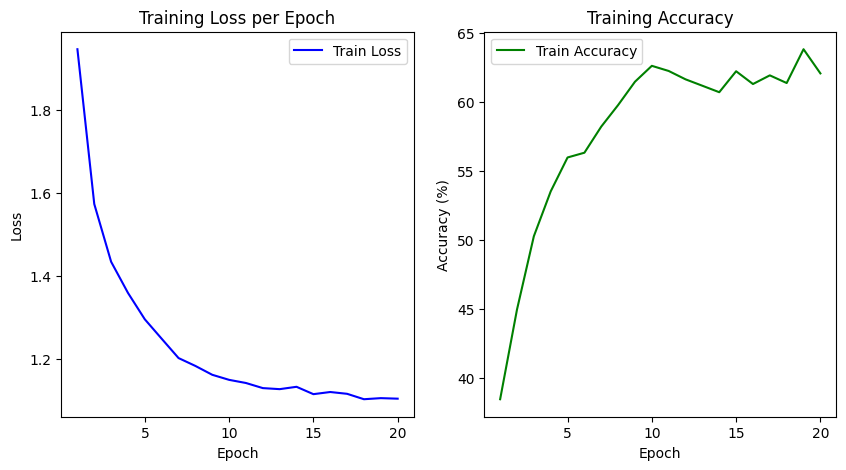

Final Train Accuracy: 62.05%
Final Validation Accuracy: 59.86%


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

# Building the CNN with Dropout
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)  # Dropout with a probability of 50%

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)  # Reshaping dynamically

        # Fully connected stage with Dropout
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Applying Dropout after the first fully connected layer
        x = self.fc2(x)

        return x

# Creating the model, loss function, and optimizer
model3 = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)

# Training the model
train_model(model3, train_loader, val_loader, criterion, optimizer, num_epochs=20)

# Evaluating accuracy on the validation set
val_accuracy = calculate_accuracy(model3, val_loader)
print(f'Final Validation Accuracy: {val_accuracy:.2f}%')


### **Experiment 9**

Epoch [1/10], Loss: 1.2247, Train Acc: 69.53%
Epoch [2/10], Loss: 0.8518, Train Acc: 76.70%
Epoch [3/10], Loss: 0.6568, Train Acc: 84.31%
Epoch [4/10], Loss: 0.4915, Train Acc: 89.78%
Epoch [5/10], Loss: 0.3452, Train Acc: 93.85%
Epoch [6/10], Loss: 0.2210, Train Acc: 95.95%
Epoch [7/10], Loss: 0.1378, Train Acc: 97.71%
Epoch [8/10], Loss: 0.0863, Train Acc: 99.05%
Epoch [9/10], Loss: 0.0509, Train Acc: 99.48%
Epoch [10/10], Loss: 0.0306, Train Acc: 99.76%
Final Validation Accuracy: 75.05%


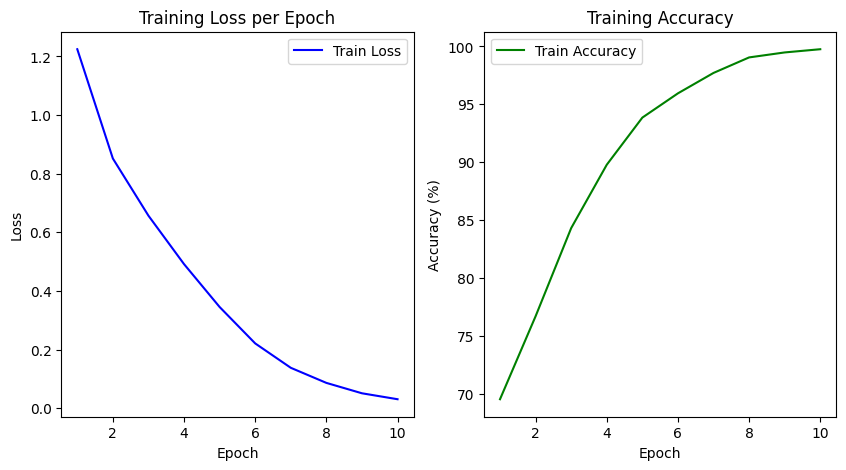

Final Train Accuracy: 99.76%
Final Validation Accuracy: 74.03%


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

# Building the CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolution layer with normalization after each Conv layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Normalization after the first layer
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # Normalization after the second layer
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer with normalization after the first fully connected layer
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.bn3 = nn.BatchNorm1d(512)  # Normalization after the fully connected layer
        self.fc2 = nn.Linear(512, 10)

        # Dropout layer
        self.dropout = nn.Dropout(p=0.3)  # Dropout with a probability of 30%

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))  # Normalization after the first layer
        x = self.pool1(x)

        x = torch.relu(self.bn2(self.conv2(x)))  # Normalization after the second layer
        x = self.pool2(x)

        x = x.view(x.size(0), -1)  # Dynamic reshaping

        x = torch.relu(self.bn3(self.fc1(x)))  # Normalization after the fully connected layer
        x = self.fc2(x)

        return x

# Creating the model, criterion, and optimizer
model3 = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.01, momentum=0.9, weight_decay=0)

# Training the model
train_model(model3, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Evaluating the accuracy on the validation set
val_accuracy = calculate_accuracy(model3, val_loader)
print(f'Final Validation Accuracy: {val_accuracy:.2f}%')


In [13]:
test_accuracy = calculate_accuracy(model3, test_loader)
print(f'Final Test Accuracy: {test_accuracy:.2f}%')

Final Test Accuracy: 73.71%


# **Running Experiments 10 and 11 on the MTA Cluster**

In [6]:
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset

# Transformations applied to the images (resizing, normalization)
transform = transforms.Compose([
    transforms.Resize(224),  # Resize images to 224x224 (required input size for ResNet)
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet mean and std
])

# Load CIFAR-10 dataset for training and testing
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Split training data into training and validation datasets (80% train, 20% validation)
train_indices = list(range(0, int(0.8 * len(train_data))))
val_indices = list(range(int(0.8 * len(train_data)), len(train_data)))

train_dataset = Subset(train_data, train_indices)
val_dataset = Subset(train_data, val_indices)

# Create DataLoader for training, validation, and test datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Print the size of the datasets
print("Train set size: {}".format(len(train_dataset)))
print("Validation set size: {}".format(len(val_dataset)))
print("Test set size: {}".format(len(test_data)))

# Load a pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)

# Freeze the parameters of the pre-trained layers
for param in model.parameters():
    param.requires_grad = False

# Modify the final fully connected layer to match the number of classes (10 for CIFAR-10)
model.fc = nn.Linear(model.fc.in_features, 10)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.SGD(model.fc.parameters(), lr=0.01, momentum=0.9)  # Stochastic Gradient Descent for the fully connected layers


# Function to train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=40):
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct = 0
        total = 0
        # Loop over batches in the training data
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the gradients

            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute the loss

            loss.backward()  # Backpropagate the gradients

            optimizer.step()  # Update the parameters

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)  # Get the predicted class
            total += labels.size(0)  # Total number of samples
            correct += (predicted == labels).sum().item()  # Count correct predictions

        # Compute and print the loss and accuracy for the current epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        print("Epoch {}/{}: Loss: {:.4f}, Accuracy: {:.2f}%".format(epoch + 1, num_epochs, epoch_loss, epoch_accuracy))

        model.eval()  # Set the model to evaluation mode
        val_accuracy = calculate_accuracy(model, val_loader)  # Calculate validation accuracy
        print("Validation Accuracy: {:.2f}%".format(val_accuracy))


# Function to calculate accuracy
def calculate_accuracy(model, val_loader):
    correct = 0
    total = 0
    with torch.no_grad():  # No gradient computation needed for evaluation
        # Loop over batches in the validation data
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get the predicted class
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total  # Calculate accuracy
    return accuracy


# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=40)

# Evaluate the model on the test dataset
test_accuracy = calculate_accuracy(model, test_loader)
print('Test Accuracy: {:.2f}%'.format(test_accuracy))


Files already downloaded and verified
Files already downloaded and verified
Train set size: 40000
Validation set size: 10000
Test set size: 10000


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 156MB/s]


KeyboardInterrupt: 

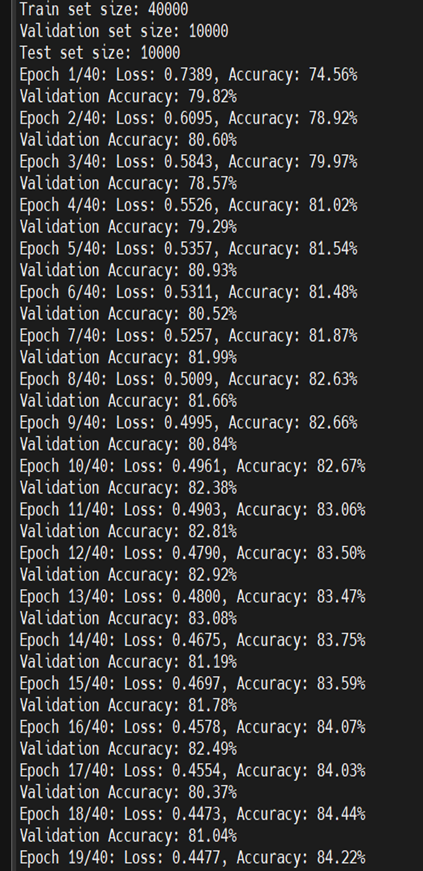

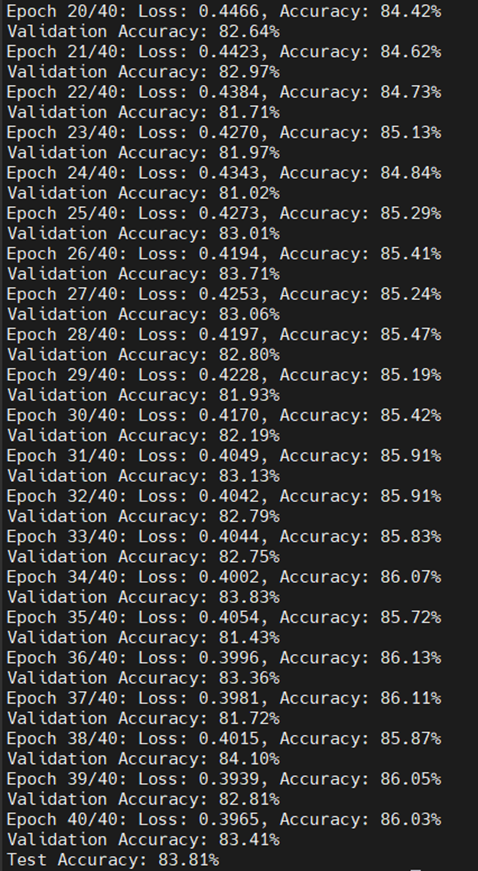